# Rotor Boom Length Analysis
This notebook is intended to investigate the expected length of the rotor boom given a certain propeller size and center hub dimensions.

Rotor Boom Properties:

|        Name        |      Properties     |     Description     |
|:------------------:|:-------------------:|:-------------------:|
|  Yield Strength    |      1783 MPa       |     Maximum Stress before Yield    |
|  Youngs Modulus    |       300 GPa       |     Property of the Stiffness      |

Some papers talk about an optimal distance between adjacent motors for improved aerodynamic efficieny.

Within the paper, the length of the arm and distance between adjacent motors is multiplied by a ratio relating to the diameter of the propeller, $D_{propeller}$, installed on the motor. The study explored ratios, $ \sigma = [1.0, 1.2, 1.4, 1.6, 1.8]$, and the effective aerodynamic improvement based on these ratios [1].

$$Arm Length = \sigma \times D_{propeller}$$

Lei [1] however, did not draw any conclusion on a specific function that relates the ratio, $\sigma$, to the aerodynamic performance but within their circumstances a higher ratio did improve the aerodynamic performance of their sUAS(small Unmanned Aircraft System). Thus there is no guarentee that the optimal ratio within Lei's [1] study will be the optimal solution within this study.

Similar performance was seen in study [2] which was specifically performed in relation to a hexacopter with 15.7" propellers. The results from [2] were not exactly the same as in [1] however the two shared similarities, specifically that higher $\sigma$ ratios improved performance. [2] showed that $\sigma=1.6$ was the optimal ratio with $\sigma=1.8$ trailing closer behind. However, an important take away from [2] was the practical benefit of having a slightly shorter rotor boom for its weight reduction, reduced moment of inertia and general ease of portability.

The main take away from [1, 2], is that the rotor boom length should be larger than the diameter of the propeller. [1, 2] both show that a $\sigma$ ratio $\ge1.2$ provides improved thrust performance and power consumption.

#### Brief Explanation on Higher $\sigma$ ratios

[1, 2] explain that the closer the rotors are spaced to each other the higher the interaction of their wakes. The wake could be explained as the air being push through the rotors and expelled on the opposite side. If there is too great an interation between the two rotor wakes it can lead to the effort of the motors being less effective. This results in the motors having to do additional work to equal the performance as in a case where there is less interaction between the motor wakes. Simply put, too much interaction between the motor wakes makes then less efficient and require more power output to perform the same amount of work.

[1, 2] both observed that lower $\sigma$ ratios produced lower pressure differences between the upper and lower surface of the propellers. Effectively accross the configurations, the pressure on the lower surfaces were distinctly similar. However, in the lower ratios, the upper pressure was higher resulting in a lower difference between the two surfaces and thus resulting in a lower produced thrust.

Thrust incase of a multirotor acts would be similar to lift, so if there is lower thrust there will be lower lift and the motors are required to work harder to produce the required lift.
### Minimum Rotor Boom Length
The minimum rotor boom length is equal to the propeller diameter. This distance is measured from a point, $O$, with an axis running through it. Point, $O$, acts as the relative origin and is the axis about which the rotor booms are evenly spaced by $60^{\circ}$, in the case of a hexacopter.

This can be shown through the following image proof which is based on an isosceles triangle. For the case of a hexacopter where the rotor boom lengths are equal and the rotor booms are spaced $60^{\circ}$ apart, an equilateral triangle is formed and thus all sides are the same length.

<img src="rboomLengthExplanation.png" alt="drawing" width="600"/>

Thus the distance between the motor centers is equal to the distance between the motor center and the origin of the frame, point $O$.

$$d_{arm2motor} = d_{motor2motor}$$

In [1]:
# Typical Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Visual Aid For the problem definition and Layout

#### Figure 1:
Hexacopter Layout Description:

|        Name        |      Description     |     Value    |
|:------------------|:-------------------:|:-------------------:|
| Wingspan    |     Distance between opposite motor centers       |     900mm   |
| Boom Length    |     CF Boom Length      |     373mm   |
| Boom Hole to Hole Length    |     CF Boom Length      |     345mm   |
| Propeller Size    |     Diameter of propeller      |     431.8mm   |
| Adjacent Distance    |     Distance between adjacent motor centers       |     470mm   |
| Angle    |     Angle between rotor booms       |     60$^{\circ}$   |

<img src="OblongSizeEstimation.png" alt="drawing" width="650"/>

### CF Boom Performance Data

In [26]:
boom_data = pd.read_csv('CSVFiles/clean_CFSquareBoom20Kg2Bolts.csv')

In [28]:
# Space required to mount the motor and boom to the chassis, i.e. where the mounting holes are.
mounting_space = 28 
boom_data["HoleToHoleLength"] = boom_data['TubeLength'] - mounting_space
boom_data.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,dataset,HoleToHoleLength
38,370.0,15.0,1.05754,38.08775,91.338,Square,342.0
39,380.0,15.0,1.15218,39.12375,94.129,Square,352.0
40,390.0,15.0,1.25225,40.15975,96.659,Square,362.0
41,400.0,15.0,1.35801,41.19575,99.567,Square,372.0
42,410.0,15.0,1.46963,42.23175,103.560,Square,382.0


### Propeller Definition

In [3]:
diam = 17 # Propeller Diameter in inches(in)
prop_diam_mm = np.round(diam * 25.4) # Propeller Diameter in millimeters(mm)

print("The following are Rounded Up Values:")
print("Propeller Diameter:",np.round(prop_diam_mm,1),"mm")

# The min dist is the same as the propeller diameter realistically this should be higher.
prop_dist_required = round(prop_diam_mm*1.05 + 1) # +1 for a round number 
print("Prop Dist Required (Min with SF):", np.round(prop_dist_required),"mm")
space_between_rotors = prop_dist_required - prop_diam_mm
print("Space Between Rotors:", np.round(space_between_rotors,1),"mm")

The following are Rounded Up Values:
Propeller Diameter: 432.0 mm
Prop Dist Required (Min with SF): 455 mm
Space Between Rotors: 23.0 mm


### Boom Length Requirements and Constants

In [4]:
sigma = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0] # sigma as described above
chassis_hole_dist = [105, 125, 150, 175, 200]

### Boom Lengths for $\sigma$ ratios 1.0 - 2.0

In [5]:
min_boom_length = prop_dist_required - chassis_hole_dist[0] + mounting_space
print("Min Boom Length:", min_boom_length,"mm")
sigma_boom_lengths = min_boom_length*np.array(sigma)
print("Sigma Ratios:",sigma_boom_lengths)

Min Boom Length: 378 mm
Sigma Ratios: [378.  453.6 529.2 604.8 680.4 756. ]


### Boom Length Analysis
The following set of code will evaluate the SOLIDWORKS data and apply the following method:
1. Given a chassis hole distance, does the `boom_data["HoleToHoleLength"]` meet the `min_boom_length`? <br>i.e. `boom_data["HoleToHoleLength"]`$\ge$ `min_boom_length`.


2. 
    True: Show the difference greater than<br>
    False: Show the still distance required<br>


3. Calculate the relative ratio of `boom_data["HoleToHoleLength"]` to `min_boom_length`

#### Shortage or Excess of Length compared to `min_boom_length`

In [29]:
boom_data["DistBetweenPropEnds"] = (boom_data['HoleToHoleLength'] + chassis_hole_dist[0]) - prop_dist_required
boom_data.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,dataset,HoleToHoleLength,DistBetweenPropEnds
38,370.0,15.0,1.05754,38.08775,91.338,Square,342.0,-8.0
39,380.0,15.0,1.15218,39.12375,94.129,Square,352.0,2.0
40,390.0,15.0,1.25225,40.15975,96.659,Square,362.0,12.0
41,400.0,15.0,1.35801,41.19575,99.567,Square,372.0,22.0
42,410.0,15.0,1.46963,42.23175,103.560,Square,382.0,32.0


#### What is the Ratio of Boom Length to `min_boom_length`

In [30]:
def ratio_func(temp_data):
    #print(temp_data)
    if temp_data['DistBetweenPropEnds'] > 0:
        return np.round((temp_data['HoleToHoleLength']+chassis_hole_dist[0])/prop_dist_required,2)
    else:
        return 1.00
    
boom_data['AeroRatio'] = boom_data.apply(ratio_func,axis=1)
boom_data.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,dataset,HoleToHoleLength,DistBetweenPropEnds,AeroRatio
38,370.0,15.0,1.05754,38.08775,91.338,Square,342.0,-8.0,1.00
39,380.0,15.0,1.15218,39.12375,94.129,Square,352.0,2.0,1.00
40,390.0,15.0,1.25225,40.15975,96.659,Square,362.0,12.0,1.03
41,400.0,15.0,1.35801,41.19575,99.567,Square,372.0,22.0,1.05
42,410.0,15.0,1.46963,42.23175,103.560,Square,382.0,32.0,1.07


In [31]:
min_space = prop_diam_mm*0.3
boom_data[boom_data['DistBetweenPropEnds']>=min_space]

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,dataset,HoleToHoleLength,DistBetweenPropEnds,AeroRatio
52,510.0,15.0,2.93820,52.59175,128.950,Square,482.0,132.0,1.29
53,520.0,15.0,3.12375,53.62775,132.670,Square,492.0,142.0,1.31
54,530.0,15.0,3.31698,54.66375,134.230,Square,502.0,152.0,1.33
55,540.0,15.0,3.51802,55.69975,136.990,Square,512.0,162.0,1.36
56,550.0,15.0,3.72723,56.73575,142.200,Square,522.0,172.0,1.38
...,...,...,...,...,...,...,...,...,...
175,660.0,30.0,1.29490,110.99400,78.082,Round,632.0,282.0,1.62
176,670.0,30.0,1.35629,112.68000,79.205,Round,642.0,292.0,1.64
177,680.0,30.0,1.41974,114.36500,80.404,Round,652.0,302.0,1.66
178,690.0,30.0,1.48523,116.05100,81.752,Round,662.0,312.0,1.69


In [9]:
boom_data[(boom_data['AeroRatio']>=1.4) & (boom_data['AeroRatio']<=1.5)]

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,HoleToHoleLength,DistBetweenPropEnds,AeroRatio
21,560.0,10.0,14.54053,37.05175,298.070,532.0,182.0,1.40
22,570.0,10.0,15.37593,37.71775,304.030,542.0,192.0,1.42
23,580.0,10.0,16.24161,38.38375,308.840,552.0,202.0,1.44
24,590.0,10.0,17.14010,39.04975,314.340,562.0,212.0,1.47
25,600.0,10.0,18.07139,39.71575,320.620,572.0,222.0,1.49
57,560.0,15.0,3.94419,57.77175,142.010,532.0,182.0,1.40
58,570.0,15.0,4.16958,58.80775,144.640,542.0,192.0,1.42
59,580.0,15.0,4.40358,59.84375,147.420,552.0,202.0,1.44
60,590.0,15.0,4.64601,60.87975,150.170,562.0,212.0,1.47
61,600.0,15.0,4.89723,61.91575,152.780,572.0,222.0,1.49


## Figures and Plotted Results

In [10]:
dfSquare = pd.read_csv("CSVFiles/clean_CFSquareBoom20Kg2Bolts.csv")
dfRound = pd.read_csv("CSVFiles/clean_CFRoundBoom20Kg2Bolts.csv")

dfConcat = pd.concat([dfSquare.assign(dataset='Square'), dfRound.assign(dataset='Round')])

In [27]:
boom_data = dfConcat
boom_data.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,dataset
38,370.0,15.0,1.05754,38.08775,91.338,Square
39,380.0,15.0,1.15218,39.12375,94.129,Square
40,390.0,15.0,1.25225,40.15975,96.659,Square
41,400.0,15.0,1.35801,41.19575,99.567,Square
42,410.0,15.0,1.46963,42.23175,103.560,Square


In [11]:
dfConcat = dfConcat[(dfConcat['TubeLength']>=370)&(dfConcat['TubeOD']>10)]

### Stress Curve
Need to do:
1. Find suitable reason for the curve spikes and jumps
2. Verify the curve shapes, do they make sense. Compare to stress vs strain curves.

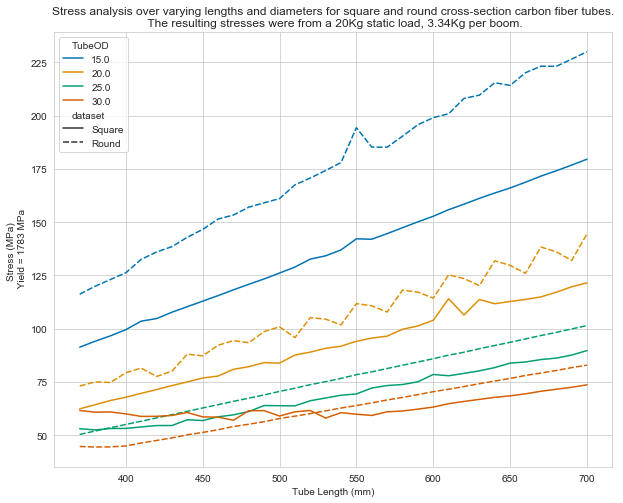

In [12]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dfConcat['TubeLength'],y=dfConcat['Stress1'],data=dfConcat,hue=dfConcat['TubeOD'], style=dfConcat['dataset'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Stress (MPa) \n Yield = 1783 MPa")
#plt.yticks([50,75,100,125,150,175,200,225])
plt.title("Stress analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.\n The resulting stresses were from a 20Kg static load, 3.34Kg per boom.")
plt.show()

In [13]:
fig.savefig("SqRndStressCurve20Kg.png")

### Displacement Curve
The carbon fiber tubes were fixed in the same way and subject to the same applied load at the opposite end of the rotor boom. The test simulated a 20Kg static load with equats to 3.34Kg per rotor boom, the test is a simulation of hovering supporting an all up weight of 20Kg.

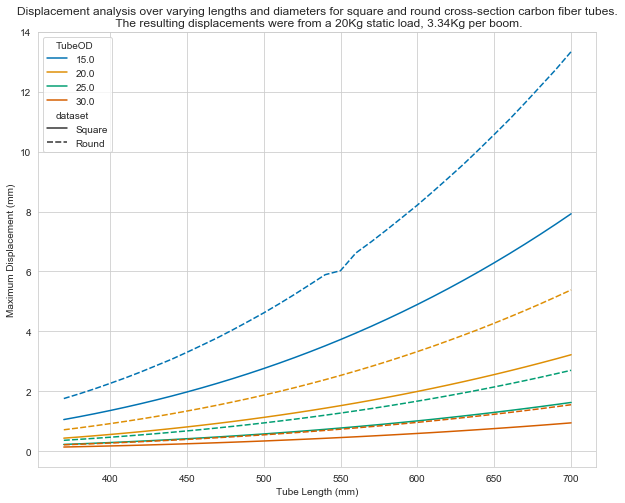

In [14]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dfConcat['TubeLength'],y=dfConcat['Displacement1'],data=dfConcat,hue=dfConcat['TubeOD'], style=dfConcat['dataset'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Maximum Displacement (mm)")
#plt.yticks([50,75,100,125,150,175,200,225])
plt.title("Displacement analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.\n The resulting displacements were from a 20Kg static load, 3.34Kg per boom.")
plt.show()

In [15]:
fig.savefig("SqRndDispCurve20Kg.png")

### Mass Curve

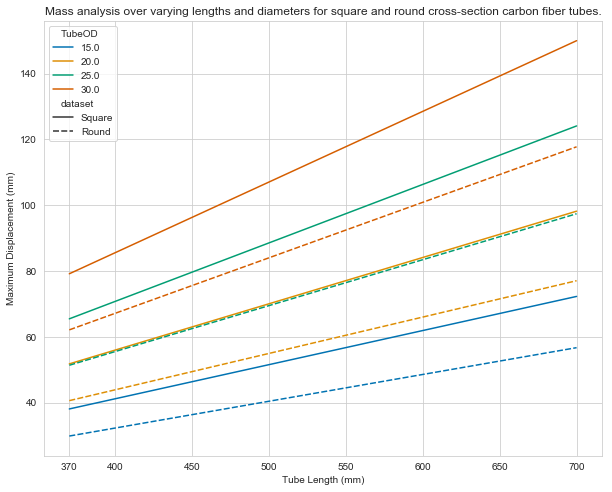

In [16]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dfConcat['TubeLength'],y=dfConcat['Mass1'],data=dfConcat,hue=dfConcat['TubeOD'], style=dfConcat['dataset'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Maximum Displacement (mm)")
plt.xticks([370,400,450,500,550,600,650,700])
plt.title("Mass analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.")
plt.show()

### Analysis on Rotor Boom Length

The expected response from increasing the rotor boom lengths as the following effects:
1. Agility vs Stability:
- Longer rotor booms provide more stability and make the sUAS less agile. This occurs as the moment of inertia increases with longer rotor booms and thus requires more energy to change the momentum. In other words, a motor on a longer rotor boom must output a higher power to bring about the same change as a motor on a shorter rotor boom.
2. Weight:
- The mass of the rotor boom increase linearly as the length increases.
- Square tubing is heavier than round however this is relfected in imporved performance in the stress induced and displacement.
3. Aerodynamic Performance
- <span style="color:red"> So the rotors do create some kind of rotor wash and turbulent air around them, I am just trying to find some explanation for it. Some hobbyst claim that a rule of thumb is the rotors should be a gap of 1/3 diameter between. In terminology, this is effectively a sigma ratio of 1.3</span>.

- [1, 2] Provide evidence that suggest having the rotors spaced further apart can improve the aerodynamic performance during hover. Both papers [1, 2] show that increasing the distance between the motors to have a dimensionless ratio greater than, $\sigma=\frac{L_{arm}}{D_{prop}}=1$, is beneficial. Ratios of $1.2\to 1.8$ show characteristics of improved thrust and power consumption. In [1], it was found that $\sigma = 1.8$ had the best efficiency however, [2] show that $\sigma=1.6$ was optimal. A point of interest made in [2] was that a **compromise** between **hover efficieny** and **rotor boom length** should be reached as longer rotor booms bring about an increase in weight and inertia of the multirotor.

## Choosing Rotor Boom Dimensions for the Science Drone

There is advantage in make the rotor booms longer than the minimum distance required and as such it is decided to choose a length which is larger than a $\sigma = 1.0$. However the results shown in [1] do not have drastic difference when comparing $\sigma$ ratios between $(1.2 - 1.8)$. Thus a boom length that improves performance but is practical in length and does not add too much weight is the target of this decision exercise.

**Note:**

It come sometimes be difficult to find Square Carbon Fiber tubing however it is beneficial to use that instead of round tubing. Thus I will provide an ideal square tubing option and an alternative round tubing.

In [125]:
focusDf = boom_data[(boom_data['AeroRatio']>1.2) & (boom_data['TubeOD']>15) & (boom_data['AeroRatio']<1.6)]
#focusDf = focusDf[focusDf["TubeOD"]==25]
focusDf.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,dataset,HoleToHoleLength,DistBetweenPropEnds,AeroRatio
85,480.0,20.0,0.99398,67.24375,82.195,Square,452.0,102.0,1.22
86,490.0,20.0,1.06037,68.64975,84.104,Square,462.0,112.0,1.25
87,500.0,20.0,1.12968,70.05575,83.858,Square,472.0,122.0,1.27
88,510.0,20.0,1.20186,71.46175,87.643,Square,482.0,132.0,1.29
89,520.0,20.0,1.27720,72.86775,89.020,Square,492.0,142.0,1.31


### Mass Curve

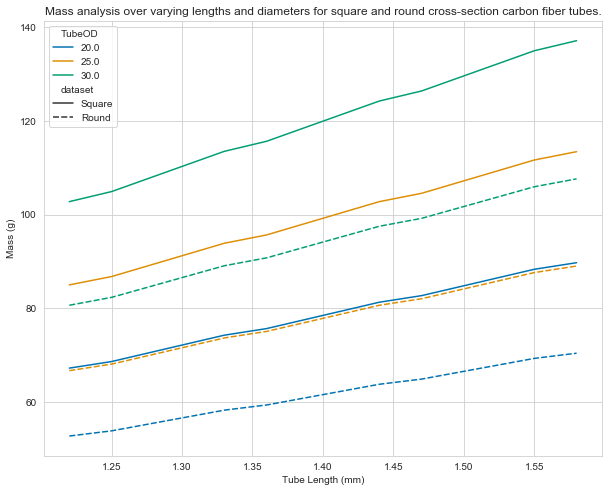

In [83]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=focusDf['AeroRatio'],y=focusDf['Mass1'],data=focusDf,hue=focusDf['TubeOD'],style=focusDf['dataset'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Mass (g)")
plt.title("Mass analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.")
plt.show()

In [113]:
focusDf[(focusDf["AeroRatio"]==1.27)&(focusDf['TubeOD']==25)]

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,dataset,HoleToHoleLength,DistBetweenPropEnds,AeroRatio
123,500.0,25.0,0.57777,88.55575,63.877,Square,472.0,122.0,1.27
123,500.0,25.0,0.94539,69.49691,70.586,Round,472.0,122.0,1.27


### Diameter Decision
Looking at AeroRatio less than 1.23
The following shows the percentage that the rotor booms will contribute to the overall weight of the drone.

It is ideal to provide just under half the maximum thrust to allow the sUAS to hover. It is however more likely, especially for heavy lift drones to provide just over half the maximum thrust to hover due to the relatively large thrust values required.

Thus, let $\Omega$ represent thrust and the thrust required to hover be defined as follows:
$$\Omega_{Hover} = 0.65\Omega_{Max} = 20Kg$$

The $\Omega_{Hover}$ represents the maximum takeoff weight of the sUAS and thus includes the all up weight(AUW) of the sUAS and any additional payload.

Weight Percentage:

In [131]:
droneMass = 7000 #Grams
print("AeroRatio = 1.22")
print("sUAS AUW: ",droneMass,"g")
print("1% = ",droneMass*0.01,"g\n")
print("Weight Contribution Percentages:")
print("Square Tubes")
print("20mm: ",np.round(((6*68)/droneMass)*100,2),"%")
print("25mm: ",np.round(((6*85)/droneMass)*100,2),"%")
print("30mm: ",np.round(((6*103)/droneMass)*100,2),"%\n")
print("Round Tubes")
print("20mm: ",np.round(((6*53)/droneMass)*100,2),"%")
print("25mm: ",np.round(((6*67)/droneMass)*100,2),"%")
print("30mm: ",np.round(((6*81)/droneMass)*100,2),"%")

AeroRatio = 1.22
sUAS AUW:  7000 g
1% =  70.0 g

Weight Contribution Percentages:
Square Tubes
20mm:  5.83 %
25mm:  7.29 %
30mm:  8.83 %

Round Tubes
20mm:  4.54 %
25mm:  5.74 %
30mm:  6.94 %


In [141]:
#Square
sq25mm = 85
#Round
rnd25mm = 67
percent = np.round(((sq25mm*6)/(rnd25mm*6)-1)*100,2)
print("Weight Diff: ",percent,"%")

Weight Diff:  26.87 %


### Conclusion on Diameter:
**Constants**:<br>
AUW of Drone $=7Kg$<br>
$\Omega_{Hover}=15Kg$

**30mm Square:**
- Square tubing of 30mm diameter would contribute almost 9% of the weight in a 7Kg drone. (Considered the shortest length)
- More optimal weight and stress solutions exist in the form of 30mm Round tubing. 25mm Square is also comparable.
- Square tubing of diameter greater than 10mm is proving difficult to find.

*Conclusion 1*:<br>
30mm Square no longer considered.

**20mm Square and 25mm Round:**
- These are very comparable in terms of weight, almost identical. However the round tubing shows better performance strength wise as well as better performance in terms of maximum displacement.
- Availability of 25mm round tubing is far more common compared to 20mm square tubing, one goolge search has proven this.
- It is thus suggested that 25mm Round tubing be selected ahead of 20mm Square tubing.

*Conclusion 2*:<br>
25mm Round Tubing performs better than 20mm Square and is more readily available.

**25mm Square and 30mm Round:**
- Notice that this improves on the performance of the 25mm **round** tubing, however it makes for a more fair comparison to look at the 30mm **round** as the weights are more closely related.
- Considering 30mm round and 25mm square tells more of the same story as the comparison of 20mm square to 25mm round, 30mm round trumps 25mm square.
- Stress is impoved in the round, so is mass, the only place of close similarity is the displacement.
- Again, the narative of availability of square tubing is poor and thus **round** tubing shows better performance here too.

*Conclusion 3*:<br>
30mm Round Tubing is a more logical choice over a 25mm Square tube.

**Discussion**:<br>
The square tubing was originally thought to be more beneficial and practical interms of fashioning quick and easy mounts in a DIY manner. However, after further consideration, working with round tubing proves to be just as easy and with the accuracy of 3D printers creating mounts for round tubes should not be an issue at all.

**CONCLUSION**:<br>
After consideration and analysis of the data produced by SOLIDWORKS simulation, it is decided that 25mm Round tubing is well balanced with regards to stress performance, mass contribution and maximum displacement. A major motivating point for round tubing compared to square tubing is just the accessibility of the material. It is hard to motivate for square tubing when it proves quite hard to find, compared to the numerious options that appear in a single google search for round tubing.

If Square, suggested option: 20mm(*Strenght cost*) or 25mm(*Weight Cost*)<br>
[Amazon Option](https://www.amazon.com/Accessories-Carbon-Square-Strength-Surface/dp/B08B5TQVV5/ref=sr_1_18?keywords=carbon%2Bfiber%2Btubes&qid=1637158366&sr=8-18&th=1)

#### Notes to Self
So why not apples to apples when comparing Round and Square?
Simple:
- I chose to keep the mass a constant instead of the diameter as this shows a better performance comparison.
- The larger diameter square does perform better in stress and displacement however it comes at a weight cost.
- Mass is a critical parameter in the drone field, I don't want to waste thrust on my frame when it could be used for heavier payload.

It's similar to the comparison of Carbon Fiber, Aluminium and Steel. When holding the weight constant then we see the true comparison of strength to weight performance. I just had to figure out my perspective of how we classify them, thus it doesn't look like apples and pears here again but more like apples and apples.

### Length Decision
It is decided to pick a rotor boom length with a ratio, $\sigma \geq 1.2$ for the likely aerodynamic performance improvement. The aero performance relates to thrust produced and power consumption. These values will not be investigated as they would be time intensive to produce the Computation Fluid Dynamic(CFD) models and are considered outside of the scope of this project, however, could be a potential stand alone project.

**Factors To Consider**:
- Practicallity of rotor booms lengths?
- Availability of CF tube lengths?
    - Impractical to buy metre long lengths to cut down to 600mm, very wasteful.
- Possible SOLIDWORKS Simulations to confirm drop test and such

### Stress Curve

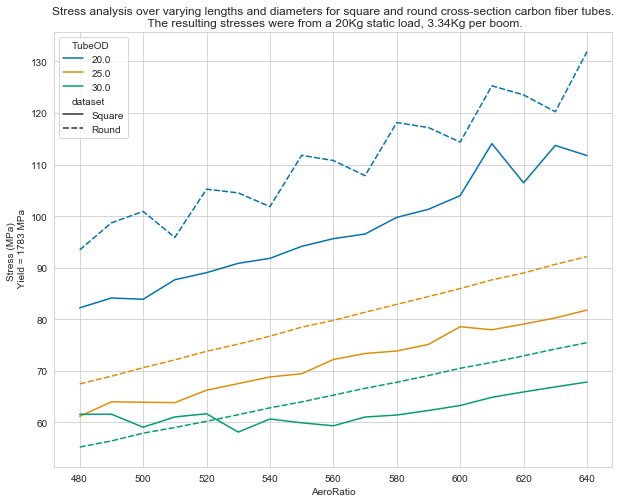

In [126]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=focusDf['TubeLength'],y=focusDf['Stress1'],data=focusDf,hue=focusDf['TubeOD'],style=focusDf['dataset'],palette='colorblind')
plt.xlabel("AeroRatio")
plt.ylabel("Stress (MPa) \n Yield = 1783 MPa")
plt.title("Stress analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.\n The resulting stresses were from a 20Kg static load, 3.34Kg per boom.")
plt.show()

### Displacement Curve

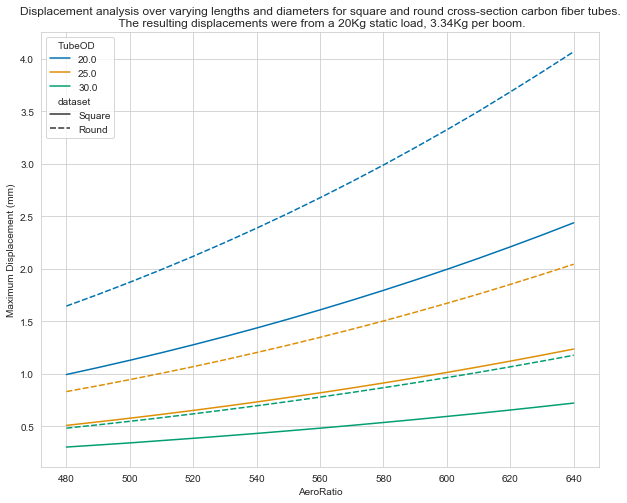

In [127]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=focusDf['TubeLength'],y=focusDf['Displacement1'],data=focusDf,hue=focusDf['TubeOD'],style=focusDf['dataset'],palette='colorblind')
plt.xlabel("AeroRatio")
plt.ylabel("Maximum Displacement (mm)")
plt.title("Displacement analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.\n The resulting displacements were from a 20Kg static load, 3.34Kg per boom.")
plt.show()

2136

# Weight Estimation

In [92]:
(105*2+510*2+432)

1662

## References:
    [1] MDPI and ACS Style Lei, Y.; Huang, Y.; Wang, H. Aerodynamic Performance of an Octorotor SUAV with Different Rotor Spacing in Hover. Processes 2020, 8, 1364. [https://doi.org/10.3390/pr8111364]
   [Link [1]](https://doi.org/10.3390/pr8111364)
   
    [2] Y. Lei and M. Cheng, “Aerodynamic performance of a hex-rotor unmanned aerial vehicle with different rotor spacing,” Measurement and Control, vol. 53, no. 3-4, pp. 711–718, 2020. [https://doi.org/10.1177/0020294019901313]
   [Link [2]](https://doi.org/10.1177/0020294019901313)
    
    